In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

- How should ER Games ensure they are in line with the trends of the industry?
- Which market besides the US should ER Games target when releasing the game?
- What impact does the changing preferences and demographics of the typical consumer have on the focus of ER Games?

In [112]:
ls

Data/                EDA.ipynb            Final Project.pages*


In [113]:
df = pd.read_csv('Data/Console.csv' , encoding='latin-1', engine='python')

In [114]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Weii Sports,Weii,2006,Sports,Ninti,41360000,28960000,3770000,8450000,7.6,51.0,8.0,322.0,Ninti,E
1,Marrison Kart Weii,Weii,2008,Racing,Ninti,15680000,12760000,3790000,3290000,8.2,73.0,8.3,709.0,Ninti,E
2,Weii Sports Resort,Weii,2009,Sports,Ninti,15610000,10930000,3280000,2950000,8.0,73.0,8.0,192.0,Ninti,E
3,New Super Marrison Bros.,DS,2006,Platform,Ninti,11280000,9140000,6500000,2880000,8.9,65.0,8.5,431.0,Ninti,E
4,Weii Play,Weii,2006,Misc,Ninti,13960000,9180000,2930000,2840000,5.8,41.0,6.6,129.0,Ninti,E


# Exploring the Data

In [115]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
publisher           object
na_sales             int64
eu_sales             int64
jp_sales             int64
other_sales          int64
critic_score       float64
critic_count       float64
user_score         float64
user_count         float64
developer           object
rating              object
dtype: object

In [116]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_count,user_score,user_count
count,8063.000000,8.063000e+03,8.063000e+03,8.063000e+03,8.063000e+03,6754.000000,6754.000000,6390.000000,6390.000000
mean,2007.689570,3.538794e+05,2.060164e+05,4.945802e+04,7.399603e+04,6.980190,27.996595,7.135587,171.226448
std,3.978577,8.883814e+05,6.335117e+05,2.510875e+05,2.506515e+05,1.346877,19.377262,1.469115,579.111116
min,2000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000,3.000000,0.000000,4.000000
25%,2005.000000,6.000000e+04,1.000000e+04,0.000000e+00,1.000000e+04,6.100000,13.000000,6.400000,11.000000
50%,2008.000000,1.400000e+05,5.000000e+04,0.000000e+00,2.000000e+04,7.100000,23.000000,7.500000,26.000000
75%,2010.000000,3.500000e+05,1.800000e+05,0.000000e+00,6.000000e+04,8.000000,39.000000,8.200000,87.000000
max,2016.000000,4.136000e+07,2.896000e+07,6.500000e+06,1.057000e+07,9.800000,113.000000,9.700000,10665.000000


In [117]:
# Convert sales to thousands for readability

df['na_sales'] = df.na_sales.apply(lambda x: x / 1000)
df['eu_sales'] = df.eu_sales.apply(lambda x: x / 1000)
df['jp_sales'] = df.jp_sales.apply(lambda x: x / 1000)
df['other_sales'] = df.other_sales.apply(lambda x: x / 1000)

In [118]:
# convert platforms

def convert_platforms(platform):
    if 'PS' in platform:
        return 'Playstation'
    elif 'X' in platform:
        return 'Xbox'
    elif 'Weii' in platform:
        return 'Wii'
    elif 'DS' in platform:
        return 'DS'
    elif 'GB' in platform:
        return 'Gameboy'
    elif 'DC' in platform:
        return 'Dreamcast'
    elif 'GC' in platform:
        return 'Gamecube'
    else:
        return platform
    
df['platform'] = df.platform.apply(convert_platforms)

In [124]:
# drop irrelavent platforms
values = ['Gameboy','Dreamcast','Gamecube']
df = df[df.platform.isin(values) == False]
df.platform.value_counts()

Playstation    2947
Xbox           1697
DS             1129
Wii             867
PC              574
Name: platform, dtype: int64

<AxesSubplot:>

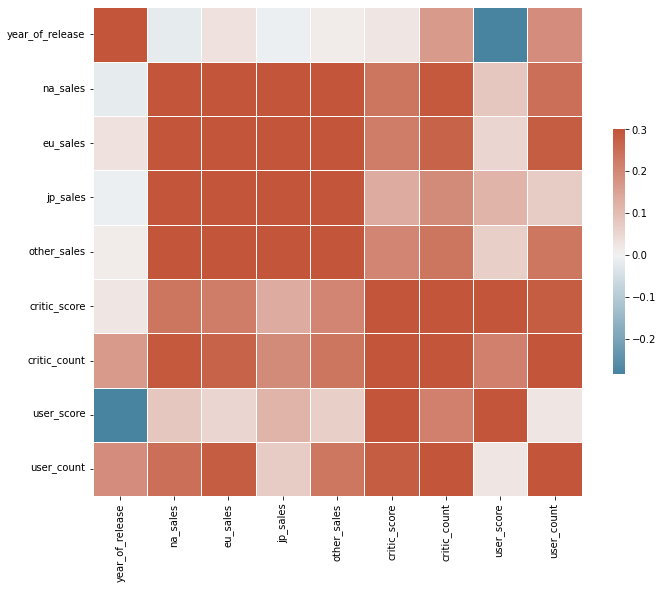

In [125]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [126]:
# Could've made zero sales as a result of the platform not being around 
na_sales_by_platform = df.pivot_table(index = 'platform', columns = 'year_of_release', values = 'na_sales', aggfunc = 'mean')
na_sales_by_platform

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,183.636364,460.131579,389.333333,318.771930,274.905660,207.025641,194.786325,251.565217,392.368421,202.812500,162.400000,176.521739,74.444444
PC,425.00000,582.857143,358.571429,130.769231,115.000000,57.391304,13.488372,56.875000,12.619048,20.333333,159.200000,124.729730,177.027027,120.384615,98.484848,70.322581,36.764706
Playstation,372.23301,503.841060,464.171429,399.058824,441.473684,357.967480,281.825095,289.163347,355.707965,331.964286,331.597938,362.397661,330.483871,406.576577,302.500000,283.818182,175.392157
Wii,NaN,NaN,NaN,NaN,NaN,NaN,2000.571429,582.177419,496.163522,483.121693,422.446043,301.573034,496.000000,309.756098,386.521739,320.476190,150.833333
Xbox,740.00000,579.259259,240.526316,233.014706,323.805970,222.658228,326.750000,554.112150,676.581197,547.272727,773.937008,555.724138,634.886364,760.945946,495.978261,467.910448,193.623188


<AxesSubplot:xlabel='year_of_release', ylabel='na_sales'>

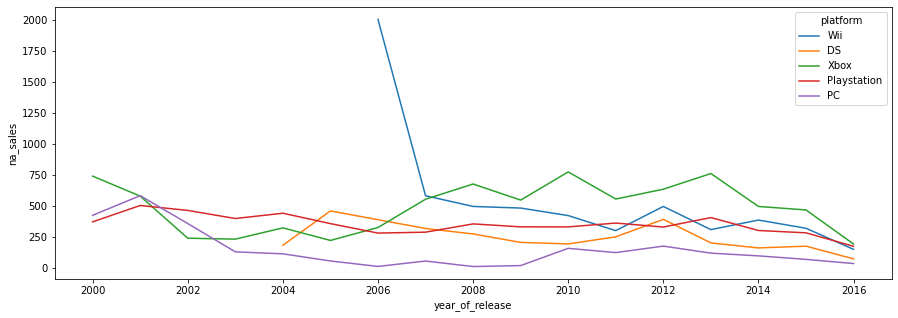

In [139]:
# plotting NA Sales 
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,5

sns.lineplot(data=df, x='year_of_release', y='na_sales', hue='platform', ci = None)

<AxesSubplot:xlabel='year_of_release', ylabel='eu_sales'>

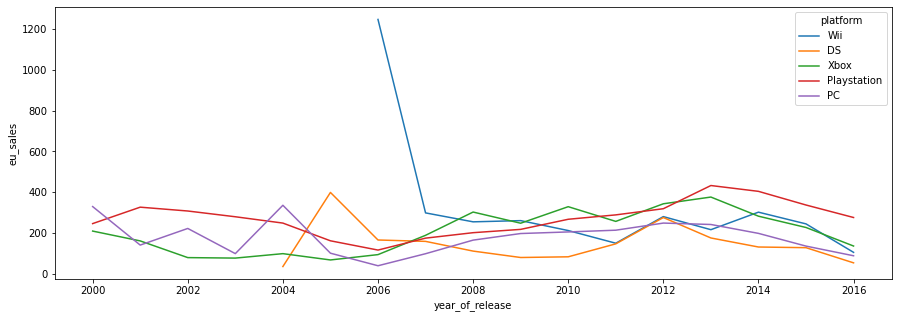

In [140]:
#EU Sales
sns.lineplot(data=df, x='year_of_release', y='eu_sales', hue='platform', ci = None)

<AxesSubplot:xlabel='year_of_release', ylabel='jp_sales'>

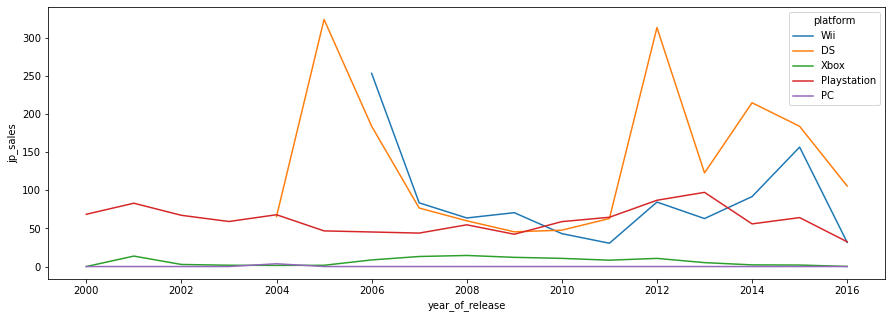

In [141]:
# Japan Sales 
sns.lineplot(data=df, x='year_of_release', y='jp_sales', hue='platform', ci = None)

<AxesSubplot:xlabel='year_of_release', ylabel='other_sales'>

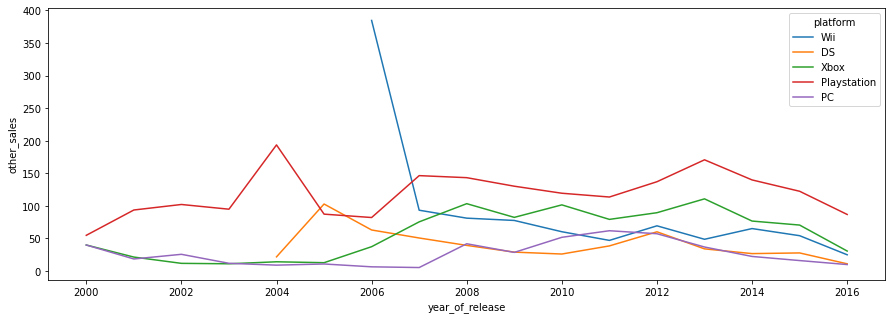

In [142]:
sns.lineplot(data=df, x='year_of_release', y='other_sales', hue='platform', ci = None)

In [145]:
genres_by_platform = df.pivot_table(index='platform',columns='genre',values='name',aggfunc='count')
genres_by_platform

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
DS,228,93,20,139,77,108,48,105,28,167,77,39
PC,124,18,3,5,9,5,38,57,111,79,35,90
Playstation,733,91,181,182,146,31,282,295,308,81,556,61
Wii,204,42,28,168,57,27,49,26,45,58,151,12
Xbox,425,37,93,122,62,8,175,77,280,48,338,32


In [162]:
genres_by_platform.div(genres_by_platform.sum(axis=1), axis=0)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
DS,0.201949,0.082374,0.017715,0.123118,0.068202,0.095660,0.042516,0.093003,0.024801,0.147919,0.068202,0.034544
PC,0.216028,0.031359,0.005226,0.008711,0.015679,0.008711,0.066202,0.099303,0.193380,0.137631,0.060976,0.156794
Playstation,0.248728,0.030879,0.061418,0.061758,0.049542,0.010519,0.095691,0.100102,0.104513,0.027486,0.188666,0.020699
Wii,0.235294,0.048443,0.032295,0.193772,0.065744,0.031142,0.056517,0.029988,0.051903,0.066897,0.174164,0.013841
Xbox,0.250442,0.021803,0.054803,0.071892,0.036535,0.004714,0.103123,0.045374,0.164997,0.028285,0.199175,0.018857
